In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

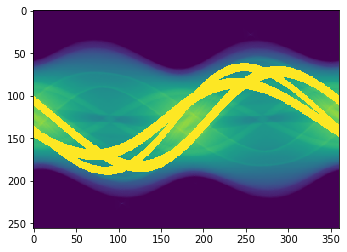

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size):
    for j in range(90-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] == 300:
                    z = 0
                else:
                    if result_img[i+window_size,j] == 0:
                        z = 0
                    else:
                        k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [9]:
k = 0

for i in range(256-window_size):
    for j in range(90-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] == 300:
                    z = 0
                else:
                    if result_img[i+window_size,j] == 0:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(15176, 3, 3, 1)
(15176, 1)
Epoch 1/1000
475/475 [==============================] - 1s 1ms/step - loss: 4.4539 - accuracy: 0.3028
Epoch 2/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.8223 - accuracy: 0.3193
Epoch 3/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.7318 - accuracy: 0.3213
Epoch 4/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.6578 - accuracy: 0.3231
Epoch 5/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.5871 - accuracy: 0.3247
Epoch 6/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.6291 - accuracy: 0.3235
Epoch 7/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.5639 - accuracy: 0.3244
Epoch 8/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.4931 - accuracy: 0.3268
Epoch 9/1000
475/475 [==============================] - 1s 1ms/step - loss: 3.4563 - accuracy: 0.3259
Epoch 10/1000
475/475 [==============================]

475/475 [==============================] - 1s 1ms/step - loss: 2.5099 - accuracy: 0.3747
Epoch 81/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.5155 - accuracy: 0.3772
Epoch 82/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.5011 - accuracy: 0.3767
Epoch 83/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.5236 - accuracy: 0.3708
Epoch 84/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.4868 - accuracy: 0.3759
Epoch 85/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.4858 - accuracy: 0.3769
Epoch 86/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.5178 - accuracy: 0.3738
Epoch 87/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.4855 - accuracy: 0.3761
Epoch 88/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.4747 - accuracy: 0.3778
Epoch 89/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.4574 - a

Epoch 159/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.3321 - accuracy: 0.3933
Epoch 160/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.3128 - accuracy: 0.3991
Epoch 161/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.3386 - accuracy: 0.3901
Epoch 162/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.3235 - accuracy: 0.3939
Epoch 163/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.3229 - accuracy: 0.3931
Epoch 164/1000
475/475 [==============================] - 1s 2ms/step - loss: 2.3577 - accuracy: 0.3900
Epoch 165/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.3340 - accuracy: 0.3933
Epoch 166/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.3125 - accuracy: 0.3971
Epoch 167/1000
475/475 [==============================] - 1s 2ms/step - loss: 2.2976 - accuracy: 0.3958
Epoch 168/1000
475/475 [==============================] - 1s 1ms

475/475 [==============================] - 1s 1ms/step - loss: 2.1659 - accuracy: 0.4139
Epoch 238/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.1401 - accuracy: 0.4176
Epoch 239/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.1774 - accuracy: 0.4075
Epoch 240/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.1622 - accuracy: 0.4173
Epoch 241/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.1611 - accuracy: 0.4110
Epoch 242/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.2091 - accuracy: 0.4041
Epoch 243/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.1508 - accuracy: 0.4137
Epoch 244/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.1628 - accuracy: 0.4113
Epoch 245/1000
475/475 [==============================] - 1s 1ms/step - loss: 2.1634 - accuracy: 0.4111
Epoch 246/1000
475/475 [==============================] - 1s 1ms/step - loss: 2

475/475 [==============================] - 1s 1ms/step - loss: 1.9602 - accuracy: 0.4281
Epoch 316/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.9769 - accuracy: 0.4222
Epoch 317/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.9379 - accuracy: 0.4317
Epoch 318/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.9448 - accuracy: 0.4266
Epoch 319/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.9373 - accuracy: 0.4295
Epoch 320/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.9257 - accuracy: 0.4311
Epoch 321/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.9310 - accuracy: 0.4295
Epoch 322/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.9376 - accuracy: 0.4252
Epoch 323/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.9198 - accuracy: 0.4297
Epoch 324/1000
475/475 [==============================] - 1s 1ms/step - loss: 1

475/475 [==============================] - 1s 1ms/step - loss: 1.7542 - accuracy: 0.4468
Epoch 394/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.7392 - accuracy: 0.4488
Epoch 395/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.7501 - accuracy: 0.4465
Epoch 396/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.7222 - accuracy: 0.4510
Epoch 397/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.7332 - accuracy: 0.4535
Epoch 398/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.7373 - accuracy: 0.4485
Epoch 399/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.7366 - accuracy: 0.4521
Epoch 400/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.7280 - accuracy: 0.4506
Epoch 401/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.7407 - accuracy: 0.4489
Epoch 402/1000
475/475 [==============================] - 1s 1ms/step - loss: 1

475/475 [==============================] - 1s 1ms/step - loss: 1.6210 - accuracy: 0.4688
Epoch 472/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.6256 - accuracy: 0.4644
Epoch 473/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.6265 - accuracy: 0.4686
Epoch 474/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.6508 - accuracy: 0.4625
Epoch 475/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.6370 - accuracy: 0.4626
Epoch 476/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.6261 - accuracy: 0.4655
Epoch 477/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.6279 - accuracy: 0.4659
Epoch 478/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.6110 - accuracy: 0.4690
Epoch 479/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.6295 - accuracy: 0.4653
Epoch 480/1000
475/475 [==============================] - 1s 1ms/step - loss: 1

475/475 [==============================] - 1s 1ms/step - loss: 1.5694 - accuracy: 0.4769
Epoch 550/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.5737 - accuracy: 0.4765
Epoch 551/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.5611 - accuracy: 0.4773
Epoch 552/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.5739 - accuracy: 0.4732
Epoch 553/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.5697 - accuracy: 0.4746
Epoch 554/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.5613 - accuracy: 0.4775
Epoch 555/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.5880 - accuracy: 0.4704
Epoch 556/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.5569 - accuracy: 0.4815
Epoch 557/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.5759 - accuracy: 0.4746
Epoch 558/1000
475/475 [==============================] - 1s 1ms/step - loss: 1

475/475 [==============================] - 1s 1ms/step - loss: 1.5043 - accuracy: 0.4822
Epoch 628/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4845 - accuracy: 0.4883
Epoch 629/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4952 - accuracy: 0.4875: 0s - loss:
Epoch 630/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.5072 - accuracy: 0.4814
Epoch 631/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4976 - accuracy: 0.4809
Epoch 632/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4895 - accuracy: 0.4866
Epoch 633/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.5039 - accuracy: 0.4804
Epoch 634/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4932 - accuracy: 0.4871
Epoch 635/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4825 - accuracy: 0.4893
Epoch 636/1000
475/475 [==============================] - 1s 1ms/st

475/475 [==============================] - 1s 1ms/step - loss: 1.4386 - accuracy: 0.4941
Epoch 706/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4398 - accuracy: 0.4942
Epoch 707/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4323 - accuracy: 0.4950
Epoch 708/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4254 - accuracy: 0.4991
Epoch 709/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4376 - accuracy: 0.4929
Epoch 710/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4372 - accuracy: 0.4928
Epoch 711/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4322 - accuracy: 0.4974
Epoch 712/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4309 - accuracy: 0.4957
Epoch 713/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4398 - accuracy: 0.4931
Epoch 714/1000
475/475 [==============================] - 1s 1ms/step - loss: 1

475/475 [==============================] - 1s 1ms/step - loss: 1.3866 - accuracy: 0.5072
Epoch 784/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4206 - accuracy: 0.4997
Epoch 785/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4050 - accuracy: 0.5014
Epoch 786/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4114 - accuracy: 0.5004
Epoch 787/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4198 - accuracy: 0.4972
Epoch 788/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4075 - accuracy: 0.5011
Epoch 789/1000
475/475 [==============================] - 1s 2ms/step - loss: 1.4097 - accuracy: 0.5019
Epoch 790/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4082 - accuracy: 0.4986
Epoch 791/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.4058 - accuracy: 0.5007
Epoch 792/1000
475/475 [==============================] - 1s 1ms/step - loss: 1

475/475 [==============================] - 1s 2ms/step - loss: 1.3961 - accuracy: 0.5059
Epoch 862/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3940 - accuracy: 0.5033
Epoch 863/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3816 - accuracy: 0.5038
Epoch 864/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3974 - accuracy: 0.5031
Epoch 865/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3869 - accuracy: 0.5011
Epoch 866/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3776 - accuracy: 0.5123
Epoch 867/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3913 - accuracy: 0.5025
Epoch 868/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3873 - accuracy: 0.5080
Epoch 869/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3663 - accuracy: 0.5120
Epoch 870/1000
475/475 [==============================] - 1s 1ms/step - loss: 1

475/475 [==============================] - 1s 1ms/step - loss: 1.4009 - accuracy: 0.5005
Epoch 940/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3589 - accuracy: 0.5122
Epoch 941/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3671 - accuracy: 0.5033
Epoch 942/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3675 - accuracy: 0.5099
Epoch 943/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3804 - accuracy: 0.5042
Epoch 944/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3695 - accuracy: 0.5099
Epoch 945/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3822 - accuracy: 0.5072
Epoch 946/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3591 - accuracy: 0.5100
Epoch 947/1000
475/475 [==============================] - 1s 1ms/step - loss: 1.3732 - accuracy: 0.5107
Epoch 948/1000
475/475 [==============================] - 1s 1ms/step - loss: 1

In [10]:
for i in range(256-window_size):
    for j in range(90-window_size):
        if 300 in result_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if result_img[i+window_size,j] == 300:
                test_data = np.zeros((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = result_img[i+w,j+v]
                prediction = model.predict(test_data)
                result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

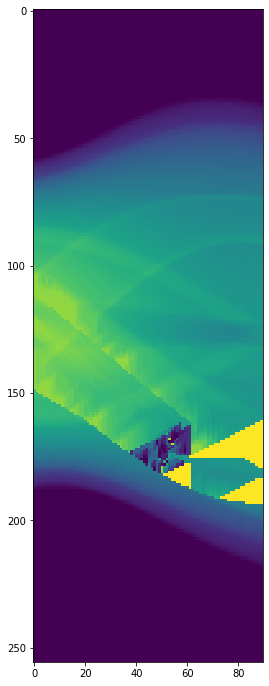

In [11]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:90])
plt.colorbar

In [12]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [13]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)